In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/streaming-subscription-churn-model/sample_submission.csv
/kaggle/input/streaming-subscription-churn-model/train.csv
/kaggle/input/streaming-subscription-churn-model/test.csv


In [2]:
train_dataset = pd.read_csv("/kaggle/input/streaming-subscription-churn-model/train.csv")
test_dataset = pd.read_csv("/kaggle/input/streaming-subscription-churn-model/test.csv")

train_dataset.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,32,Montana,Free,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,2,64,New Jersey,Free,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,3,51,Washington,Premium,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,4,63,California,Family,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,5,54,Washington,Family,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


In [3]:
train_dataset = train_dataset.drop(columns ="customer_id")
test_dataset = test_dataset.drop(columns = "customer_id")

In [4]:
train_dataset.head()

,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,32,Montana,Free,Yearly,2,Paypal,Medium,-1606,22.391362,105.394516,0.176873,169,109,18,32,52,35,46,0
1,64,New Jersey,Free,Monthly,3,Paypal,Low,-2897,29.294210,52.501115,0.981811,55,163,44,33,12,25,37,1
2,51,Washington,Premium,Yearly,2,Credit Card,High,-348,15.400312,24.703696,0.048411,244,117,20,129,50,28,38,0
3,63,California,Family,Yearly,4,Apple Pay,Medium,-2894,22.842084,83.595480,0.035691,442,252,47,120,55,17,24,0
4,54,Washington,Family,Monthly,3,Paypal,High,-92,23.151163,52.578266,0.039738,243,230,41,66,40,32,47,0


In [5]:
unique_list = ["subscription_type","payment_plan","payment_method","customer_service_inquiries"]
for i in unique_list:
    print(f"{i}: ",train_dataset[i].unique())

subscription_type:  ['Free' 'Premium' 'Family' 'Student']
payment_plan:  ['Yearly' 'Monthly']
payment_method:  ['Paypal' 'Credit Card' 'Apple Pay' 'Debit Card']
customer_service_inquiries:  ['Medium' 'Low' 'High']


In [6]:
train_dataset["customer_service_inquiries"] = train_dataset["customer_service_inquiries"].replace({"Medium":0,"Low":1,"High":2}).astype(int)
test_dataset["customer_service_inquiries"] = test_dataset["customer_service_inquiries"].replace({"Medium":0,"Low":1,"High":2}).astype(int)

train_dataset["payment_plan"] = train_dataset["payment_plan"].replace({"Yearly":0,"Monthly":1}).astype(int)
test_dataset["payment_plan"] = test_dataset["payment_plan"].replace({"Yearly":0,"Monthly":1}).astype(int)

train_dataset = pd.get_dummies(train_dataset,columns = ["subscription_type","payment_method","location"])
test_dataset = pd.get_dummies(test_dataset,columns = ["subscription_type","payment_method","location"])


/tmp/ipykernel_13/2561355063.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_dataset["customer_service_inquiries"] = train_dataset["customer_service_inquiries"].replace({"Medium":0,"Low":1,"High":2}).astype(int)
/tmp/ipykernel_13/2561355063.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_dataset["customer_service_inquiries"] = test_dataset["customer_service_inquiries"].replace({"Medium":0,"Low":1,"High":2}).astype(int)
/tmp/ipykernel_13/2561355063.py:4: FutureWarning: Downcasting behavior in `replace` is depreca

In [7]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   age                         125000 non-null  int64  
 1   payment_plan                125000 non-null  int64  
 2   num_subscription_pauses     125000 non-null  int64  
 3   customer_service_inquiries  125000 non-null  int64  
 4   signup_date                 125000 non-null  int64  
 5   weekly_hours                125000 non-null  float64
 6   average_session_length      125000 non-null  float64
 7   song_skip_rate              125000 non-null  float64
 8   weekly_songs_played         125000 non-null  int64  
 9   weekly_unique_songs         125000 non-null  int64  
 10  num_favorite_artists        125000 non-null  int64  
 11  num_platform_friends        125000 non-null  int64  
 12  num_playlists_created       125000 non-null  int64  
 13  num_shared_pla

In [8]:
from sklearn.model_selection import train_test_split

x = train_dataset.drop(columns = "churned")
y = train_dataset["churned"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score

model_random = RandomForestClassifier(n_estimators = 100)
model_random.fit(x_train,y_train)
y_pred_random = model_random.predict(x_test)
print("Classification Report",classification_report(y_test,y_pred_random))
print("AUC SCORE: " ,roc_auc_score(y_test,y_pred_random))

Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.84     12219
           1       0.85      0.86      0.85     12781

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

AUC SCORE:  0.8459009515842434


In [10]:
from lightgbm import LGBMClassifier as LGBM

model_lgbm = LGBM(n_estimators = 100)
model_lgbm.fit(x_train,y_train)
y_pred_lgbm = model_lgbm.predict(x_test)
print("Classification Report",classification_report(y_test,y_pred_lgbm))
print("AUC SCORE: " ,roc_auc_score(y_test,y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 51393, number of negative: 48607
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2092
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513930 -> initscore=0.055734
[LightGBM] [Info] Start training from score 0.055734
Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84     12219
           1       0.84      0.87      0.85     12781

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

AUC SCORE:  0.

In [11]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(verbosity=2)
model_xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)

print("Classification Report",classification_report(y_test,y_pred_xgb))
print("AUC SCORE: " ,roc_auc_score(y_test,y_pred_xgb))

Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.85     12219
           1       0.85      0.85      0.85     12781

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

AUC SCORE:  0.8484910925129978


In [12]:
model_list = {
    "Random Forest": model_random,
    "lightgbm": model_lgbm,
    "xgboost": model_xgb    
}

for name,model in model_list.items():
    y_pred = model.predict(x_test)
    print(f"{name}\n")
    print("Classification Report",classification_report(y_test,y_pred))
    print("AUC SCORE: " ,roc_auc_score(y_test,y_pred))

Random Forest

Classification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.84     12219
           1       0.85      0.86      0.85     12781

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

AUC SCORE:  0.8459009515842434
lightgbm

Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84     12219
           1       0.84      0.87      0.85     12781

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

AUC SCORE:  0.8487535611516294
xgboost

Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.85     12219
           1       0.85      0.85      0.85     12781

    accuracy        

In [13]:
from lightgbm import LGBMClassifier as LGBM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

update_model_gbm = LGBM(random_state = 0)

param_grid = {
    "n_estimators" : [100,200],
    "max_depth" : [6,8],
    "learning_rate": [0.01,0.1],
    "num_leaves": [20,31],
    "min_child_samples" : [20,30],
}



grid_search = GridSearchCV(
    estimator = update_model_gbm,
    param_grid = param_grid,
    scoring = "roc_auc",
    cv = 3,
    verbose = 2,
    n_jobs=-1
)


grid_search.fit(x_train,y_train)
print("en iyi sonuç: ",grid_search.best_score_)
print("en iyi değerler: ",grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34262, number of negative: 32404
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2090
[LightGBM] [Info] Number of data points in the train set: 66666, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513935 -> initscore=0.055755
[LightGBM] [Info] Start training from score 0.055755
[CV] END learning_rate=0.01, max_depth=6, min_child_samples=20, n_estimators=100, num_leaves=20; total time=   3.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34262, number of negative: 32405
[LightGBM] [Info] Auto-choosing col-

In [14]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:,1]
print(classification_report(y_test,y_pred))
print("AUC Değeri: ",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     12219
           1       0.85      0.86      0.85     12781

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

AUC Değeri:  0.9429932972399575


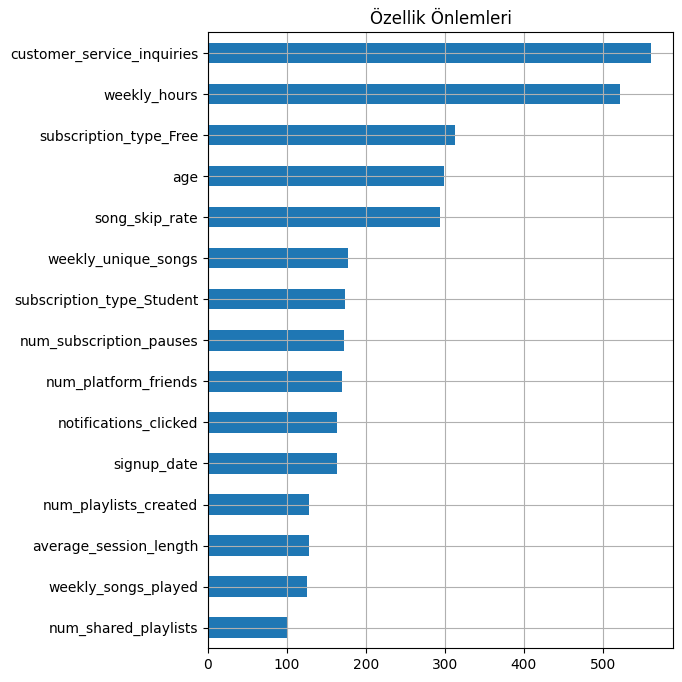

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_model.feature_importances_,index = x_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind ="barh",figsize = (6,8),title ="Özellik Önlemleri")
plt.grid()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


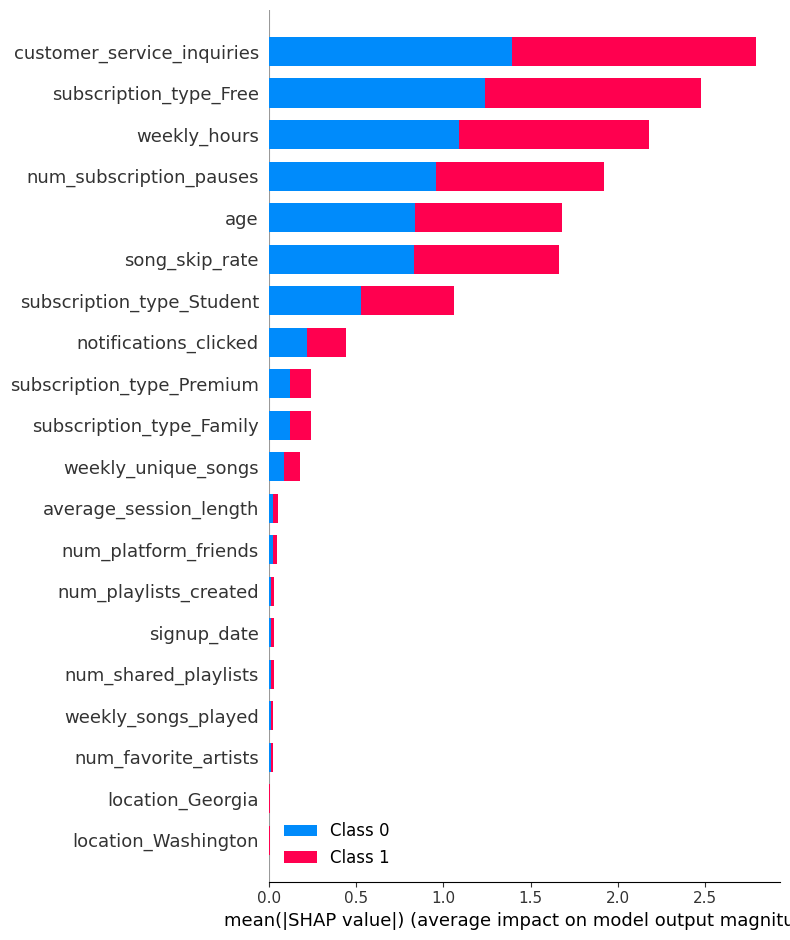

In [16]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,plot_type="bar")

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaler = sc.fit_transform(x_train)
x_test_scaler = sc.transform(x_test)
test_dataset_scaler = sc.transform(test_dataset)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential([
    Dense(64,input_shape=(x_train_scaler.shape[1],),activation = "relu"),
    Dropout(0.3),
    Dense(32,activation="relu"),
    Dropout(0.3),
    Dense(1,activation="sigmoid")    
])

model.compile(
    optimizer="adam",
    loss ="binary_crossentropy",
    metrics = ["accuracy",tf.keras.metrics.AUC()]
)

history = model.fit(
    x_train_scaler,y_train,
    epochs = 30,
    batch_size = 256,
    validation_split=0.2,
    verbose = 2
)

loss, accuracy,auc =model.evaluate(x_test_scaler,y_test)
print("Test AUC: ",auc)
print("Test Accuracy: ",accuracy)

2025-07-12 18:04:20.269048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752343460.514847      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752343460.582765      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/30


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
2025-07-12 18:04:35.773002: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


313/313 - 4s - 12ms/step - accuracy: 0.6924 - auc: 0.7666 - loss: 0.5738 - val_accuracy: 0.7533 - val_auc: 0.8384 - val_loss: 0.4956
Epoch 2/30
313/313 - 1s - 3ms/step - accuracy: 0.7527 - auc: 0.8328 - loss: 0.5025 - val_accuracy: 0.7720 - val_auc: 0.8576 - val_loss: 0.4694
Epoch 3/30
313/313 - 1s - 4ms/step - accuracy: 0.7793 - auc: 0.8598 - loss: 0.4664 - val_accuracy: 0.7951 - val_auc: 0.8818 - val_loss: 0.4322
Epoch 4/30
313/313 - 1s - 4ms/step - accuracy: 0.7911 - auc: 0.8733 - loss: 0.4447 - val_accuracy: 0.7994 - val_auc: 0.8903 - val_loss: 0.4174
Epoch 5/30
313/313 - 1s - 4ms/step - accuracy: 0.7968 - auc: 0.8817 - loss: 0.4308 - val_accuracy: 0.8033 - val_auc: 0.8949 - val_loss: 0.4072
Epoch 6/30
313/313 - 1s - 3ms/step - accuracy: 0.8022 - auc: 0.8874 - loss: 0.4204 - val_accuracy: 0.8073 - val_auc: 0.8993 - val_loss: 0.4001
Epoch 7/30
313/313 - 1s - 3ms/step - accuracy: 0.8039 - auc: 0.8921 - loss: 0.4116 - val_accuracy: 0.8073 - val_auc: 0.9011 - val_loss: 0.3938
Epoch 8/3

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred_prop = model.predict(x_test_scaler)
y_pred = (y_pred_prop > 0.5).astype(int)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     12219
           1       0.83      0.85      0.84     12781

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

[[10049  2170]
 [ 1972 10809]]


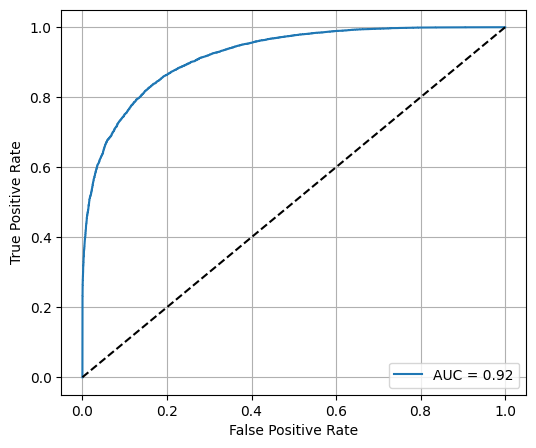

In [20]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

fgr,tpr, thresholds = roc_curve(y_test,y_pred_prop)
roc_auc = auc(fgr,tpr)

plt.figure(figsize = (6,5))
plt.plot(fgr,tpr,label="AUC = %0.2f" %roc_auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()

In [21]:
y_submission_proba = model.predict(test_dataset_scaler)
y_submission = (y_submission_proba>0.5).astype(int).reshape(-1)

test_csv = pd.read_csv("/kaggle/input/streaming-subscription-churn-model/test.csv")  

submission = pd.DataFrame({
    "customer_id": test_csv["customer_id"],  # Orijinal test dosyasındaki ID sütunu
    "prediction": y_submission
})

submission.to_csv("submission.csv",index = False)

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
